## **Exploratory Data Analysis of the Internship Dataset**

This document contais the exploratory data analysis performed on a dataset containing Internship data. The original dataset was sourced from kaggle, the cleaning and preprocessing of the dataset was performed through Microsoft Excel and SQL via Google's BigQuery.



Disclaimer: The metrics and analytics presented in this report are derived from a pre-sourced dataset obtained from Kaggle and are part of an independent analytics project. The creator of this report does not claim any responsibility for the accuracy, completeness, or real-life applicability of the findings. The information provided is based on the dataset available and may not reflect current or real-world conditions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as plx

As seen below the dataset contains 8 columns and 6452 unique rows

In [ ]:
df=pd.read_csv('/content/stipend data cleaned.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6452 entries, 0 to 6451
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Role                    6452 non-null   object 
 1   Organization            6452 non-null   object 
 2   Location                6452 non-null   object 
 3   Start Date              6452 non-null   object 
 4   Duration in Months      6452 non-null   float64
 5   Average Monthy Stipend  6452 non-null   float64
 6   Added Incentives        6452 non-null   object 
 7   Currency                6452 non-null   object 
dtypes: float64(2), object(6)
memory usage: 403.4+ KB


,Role,Organization,Location,Start Date,Duration in Months,Average Monthy Stipend,Added Incentives,Currency
0,Talent Acquisition,Marpu Foundation,Remote,Immediately,0.25,0.0,No,INR
1,Social Work,Marpu Foundation,Remote,Immediately,0.25,0.0,No,INR
2,Event Coordination,Aam Aadmi Party,Delhi,Immediately,0.25,0.0,No,INR
3,Human Resources (HR),Subhansh Sewa Trust,Remote,Immediately,0.25,0.0,No,INR
4,Induction Representation,Subhansh Sewa Trust,Remote,Immediately,0.25,0.0,No,INR


The following is the structure of a dataset derived, from the original dataset, from sql. This shows us the nuber of internship vacancies for various ranges of stipends

In [ ]:
df2=pd.read_csv('/content/stipend_ranges.csv')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stipend_range       38 non-null     object
 1   number_of_openings  38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 736.0+ bytes


,stipend_range,number_of_openings
0,0 or less,218
1,0-999,35
2,10000-10999,873
3,1000-1999,481
4,11000-11999,145


The plot below depicts a bar graph of the top 20 pay ranges against the number of openings. As inferred from the graph, the most commonly offered pay lies between the range of INR 5000 to INR 5999 with over 800 internships offering the same.

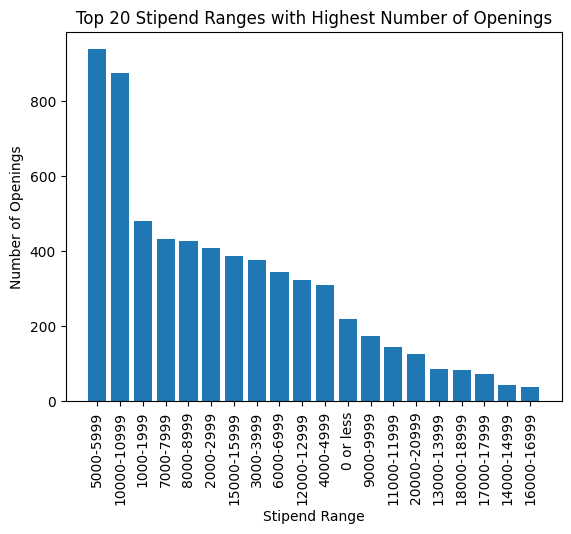

In [ ]:
# @title
df2_sorted = df2.sort_values('number_of_openings', ascending=False).head(20)
plt.bar(df2_sorted['stipend_range'], df2_sorted['number_of_openings'])
plt.xlabel('Stipend Range')
plt.ylabel('Number of Openings')
plt.title('Top 20 Stipend Ranges with Highest Number of Openings')
_ = plt.xticks(rotation=90)

The Scatter plot below shows the relationship between the Average Monthly Stipend and the Average Duration of the internship, from the graph it is observed that a longer tenure of internship does not really indicate a higher pay

Text(0.5, 1.0, 'Average Monthy Stipend vs Duration in Months')

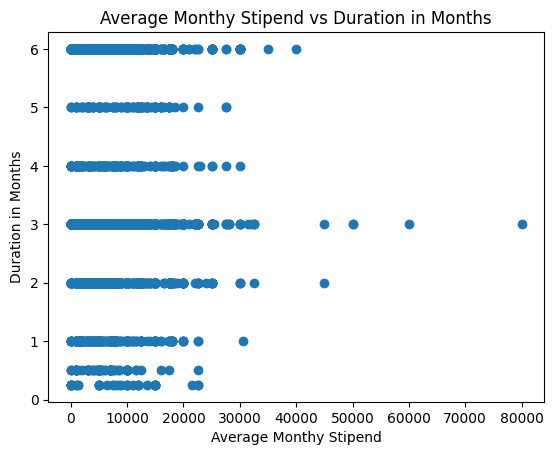

In [ ]:
plt.scatter(df['Average Monthy Stipend'],df['Duration in Months'])
plt.xlabel('Average Monthy Stipend')
plt.ylabel('Duration in Months')
plt.title('Average Monthy Stipend vs Duration in Months')

The below Pie Chart shows the ratio of the number of remote internships to in person internships. We can observe that the ratio between the number of in-person internsips to the remote internships is around 1.27:1.

Number of Remote Roles: 2843
Number of Inperson Roles: 3609


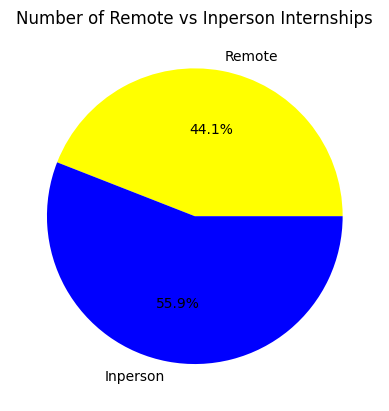

In [ ]:
no_of_remote_roles= df['Location'].value_counts()['Remote']

no_of_inperson_roles= df["Location"].count()-no_of_remote_roles

print("Number of Remote Roles:",no_of_remote_roles)
print("Number of Inperson Roles:",no_of_inperson_roles)

plt.pie([no_of_remote_roles,no_of_inperson_roles],labels=['Remote','Inperson'],autopct='%1.1f%%',colors=['yellow','blue'])
plt.title('Number of Remote vs Inperson Internships')
plt.show()

The Pie chart below shows the ten most popular locations for in person internships, as seen from the graph, the city of Mumbai has the most number of openings and accounts for roughly 21.6% of all the open internhsips in the dataset followd by Delhi with 19.6% and Bangalore with 17.3% of the openings. This finding is further confirmed by the bar chart that shows us twenty locations in India which offer the largest number of internships according to the dataset

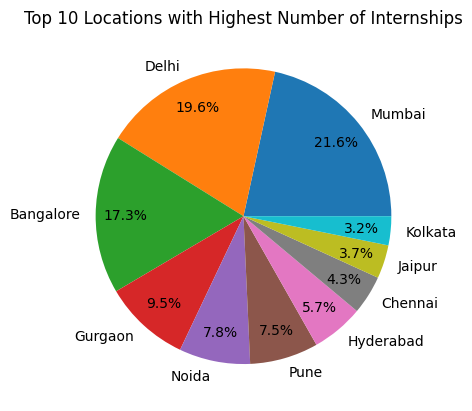

In [ ]:
# pie chart of top 10 locations for inperson internships
filtered_df= df[df["Location"]!='Remote']
top_10_locations= filtered_df.groupby("Location")["Role"].count().sort_values(ascending=False).head(10)

plt.pie(top_10_locations, labels=top_10_locations.index,pctdistance=0.8,autopct='%1.1f%%')
plt.title('Top 10 Locations with Highest Number of Internships')
plt.show()


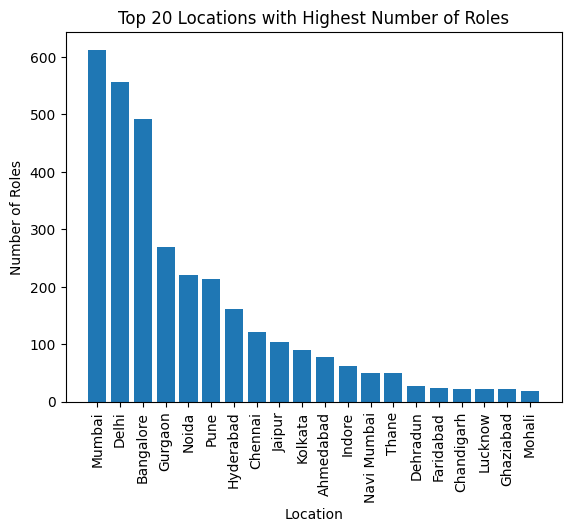

In [ ]:
top_20_locations= filtered_df.groupby("Location")["Role"].count().sort_values(ascending=False).head(20)
plt.bar(top_20_locations.index,top_20_locations.values)
plt.xlabel('Location')
plt.ylabel('Number of Roles')
plt.title('Top 20 Locations with Highest Number of Roles')
plt.xticks(rotation=90)
plt.show()

The following list and bar graph depict 50 of the most offered internship positions, as we can see that the Business Develeopment in the department of Sales tops the list with 371 openings across India.

In [ ]:
most_offered_roles= df.groupby("Role")["Role"].count().sort_values(ascending=False).head(50)
print(most_offered_roles)

Role
Business Development (Sales)          371
Social Media Marketing                361
Digital Marketing                     361
Graphic Design                        327
Human Resources (HR)                  305
Content Writing                       215
Marketing                             137
Video Making/Editing                   92
Search Engine Optimization (SEO)       80
Sales                                  76
Business Development                   68
Operations                             64
Telecalling                            50
Web Development                        50
Law/Legal                              50
Video Editing                          49
Recruitment                            36
WordPress Development                  36
UI/UX Design                           35
Market Research                        33
Talent Acquisition                     31
Architecture                           30
Campus Ambassador                      30
Social Media Management      

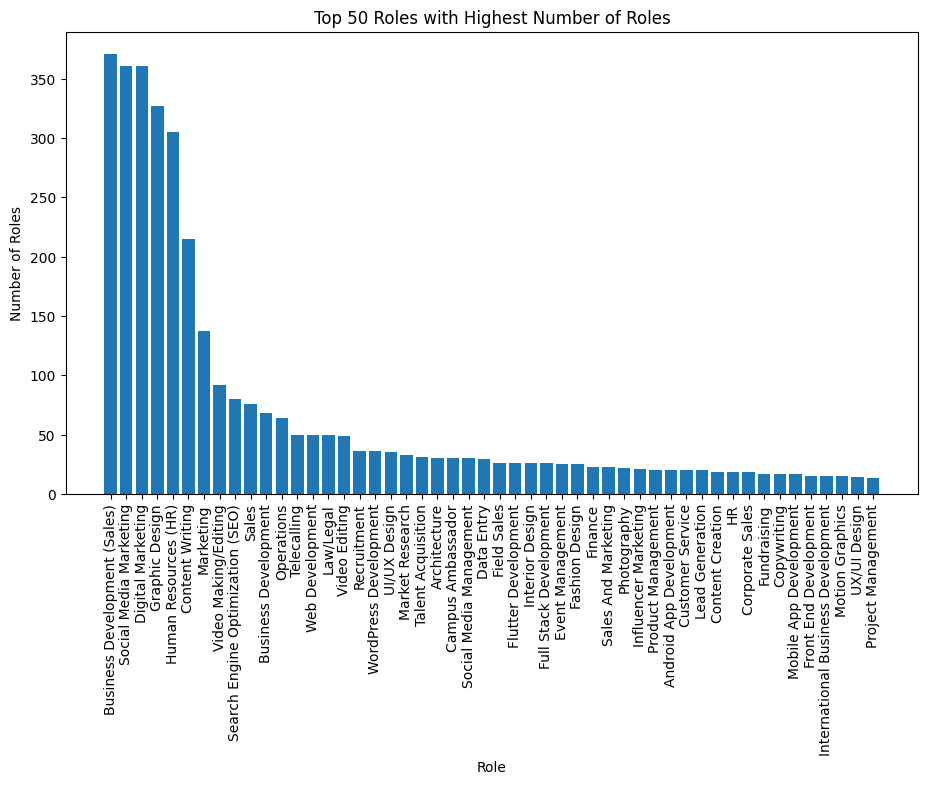

In [ ]:
plt.figure(figsize=(11,6))
plt.bar(most_offered_roles.index,most_offered_roles.values,width=.8)
plt.xlabel('Role')
plt.ylabel('Number of Roles')
plt.title('Top 50 Roles with Highest Number of Roles')
plt.xticks(rotation=90)
plt.show()

The below graph shows us ten Roles with the highest Median monthly stipend, it is seen that on average an internship in C++ development pays the most.

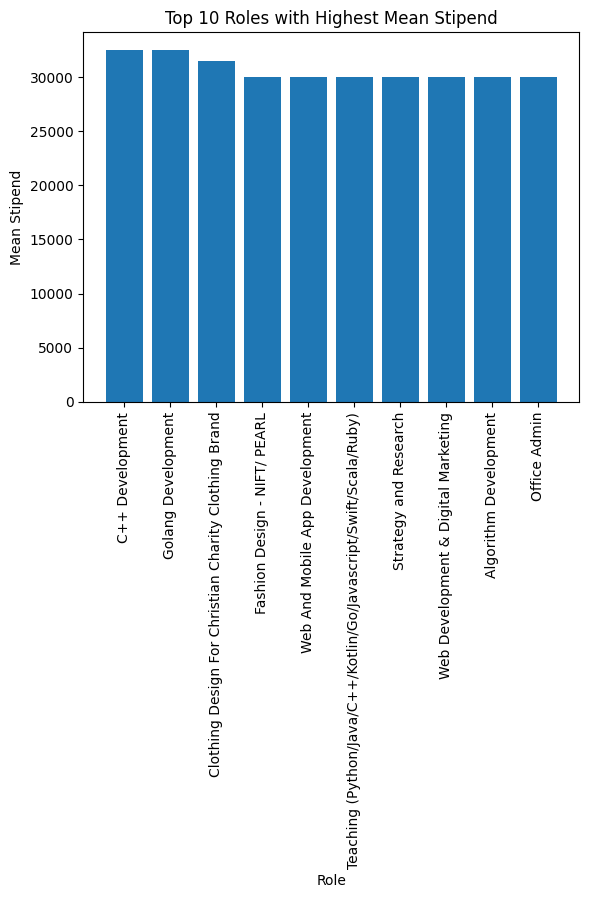

In [ ]:
postions_with_highest_pay= df[["Role","Average Monthy Stipend"]].groupby("Role")["Average Monthy Stipend"].mean().sort_values(ascending=False).head(10)

plt.bar(postions_with_highest_pay.index,postions_with_highest_pay.values)
plt.xlabel('Role')
plt.ylabel('Mean Stipend')
plt.title('Top 10 Roles with Highest Mean Stipend')
plt.xticks(rotation=90)
plt.show()


Below is the list of 10 companies that offer the highest average stipends to the candidates.

Organization
Desigo Milk                                     80000.0
Saathi Eco Innovations India Private Limited    60000.0
Ekostay LLP                                     50000.0
The Concept Co.                                 50000.0
GoComet                                         45000.0
Digit88                                         40000.0
NOIR & BLANCO                                   35000.0
Nerdy Academy                                   32500.0
AltaSierra                                      31500.0
Runpluson Private Limited                       30500.0
Name: Average Monthy Stipend, dtype: float64


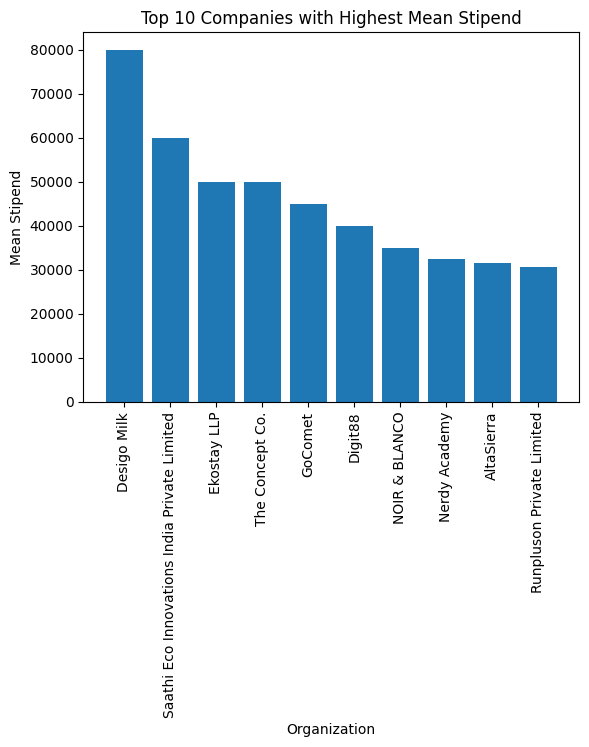

In [ ]:
top_paying_companies= df.groupby("Organization")["Average Monthy Stipend"].mean().sort_values(ascending=False).head(10)
print(top_paying_companies)

plt.bar(top_paying_companies.index,top_paying_companies.values)
plt.xlabel('Organization')
plt.ylabel('Mean Stipend')
plt.title('Top 10 Companies with Highest Mean Stipend')
plt.xticks(rotation=90)
plt.show()

The following Graph depicts 15 companies that have the most amount of internship offerings

Organization
Top Talent Bridge                                 49
Stirring Minds                                    31
HappiMynd                                         30
Pawzz                                             26
Narigiri's Connect To Universe Private Limited    26
Pereyan LLP                                       22
Blackcoffer                                       22
Avaari                                            19
Across The Globe (ATG)                            19
Buddha Education Association Incorporation        18
QA Solvers                                        18
Eduminatti                                        18
Shubh International                               17
Qriocity Ventures Private Limited                 17
HaZZten                                           17
Name: Role, dtype: int64


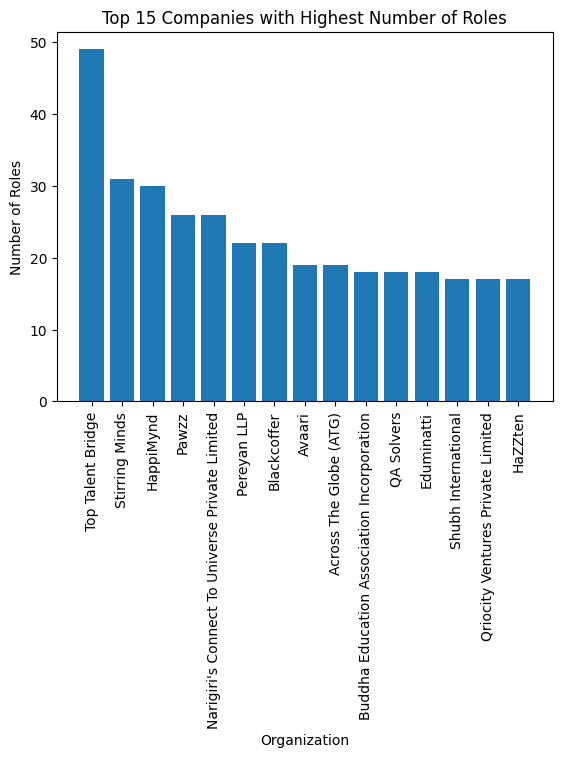

In [ ]:
highest_no_of_offers=df.groupby("Organization")["Role"].count().sort_values(ascending=False).head(15)
print(highest_no_of_offers)

plt.bar(highest_no_of_offers.index,highest_no_of_offers.values)
plt.xlabel('Organization')
plt.ylabel('Number of Roles')
plt.xticks(rotation=90)
plt.title('Top 15 Companies with Highest Number of Roles')
plt.show()